In [3]:
# import statements — add as necessary and run first
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.sparse.linalg import cg

/var/folders/16/k6dpzsh941s8pp1_zmvjg9gr0000gn/T/ipykernel_92534/2434288139.py:14: DeprecationWarning: 'scipy.sparse.linalg.cg' keyword argument `tol` is deprecated in favor of `rtol` and will be removed in SciPy v1.14.0. Until then, if set, it will override `rtol`.
  x, _ = cg(A, b, tol=tol, callback=callback)


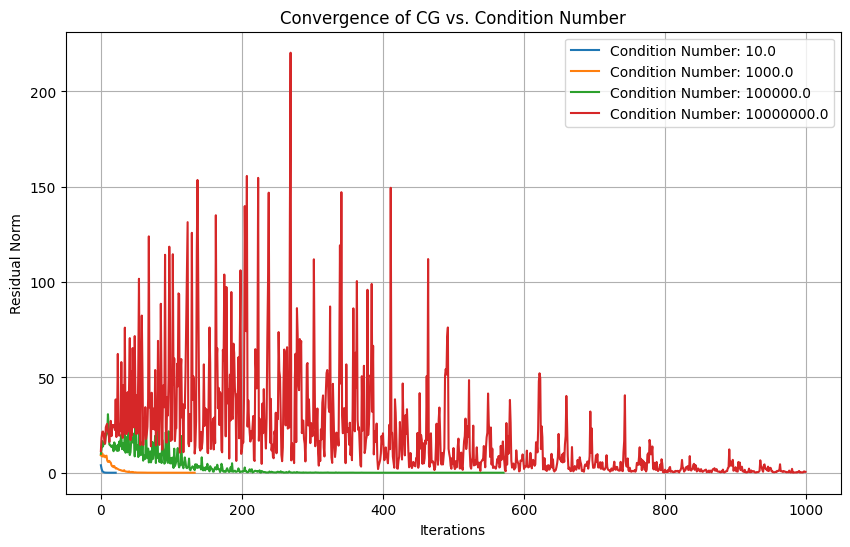

In [5]:
def generate_spd_matrix(n, kappa): # n by n matrix, condition number kappa
    evals = np.logspace(0, np.log10(kappa), n)
    Q, _ = np.linalg.qr(np.random.randn(n,n)) # this should make a random orthogonal matrix
    A = Q @ np.diag(evals) @ Q.T # def of eigendecomposition 
    return A

def cg_solver(A, b, tol=1e-6):
    residuals = []

    def callback(x_k):
        r = b - A @ x_k 
        residuals.append(np.linalg.norm(r)) # ensure we track history

    x, _ = cg(A, b, tol=tol, callback=callback)
    return x, residuals 

# conduct experiments and see if anything *jumps out*
n = 100  # Matrix size
condition_numbers = [1e1, 1e3, 1e5, 1e7]  # Varying condition numbers
results = {}

for kappa in condition_numbers:
    A = generate_spd_matrix(n, kappa)
    b = np.random.rand(n)
    _, residuals = cg_solver(A, b)
    results[kappa] = residuals

# Plot results
plt.figure(figsize=(10, 6))
for kappa, residuals in results.items():
    plt.plot(residuals, label=f"Condition Number: {kappa}")
plt.xlabel("Iterations")
plt.ylabel("Residual Norm")
plt.title("Convergence of CG vs. Condition Number")
plt.legend()
plt.grid()
plt.show()
